Mean Load: 50 ; Variance Load: 10


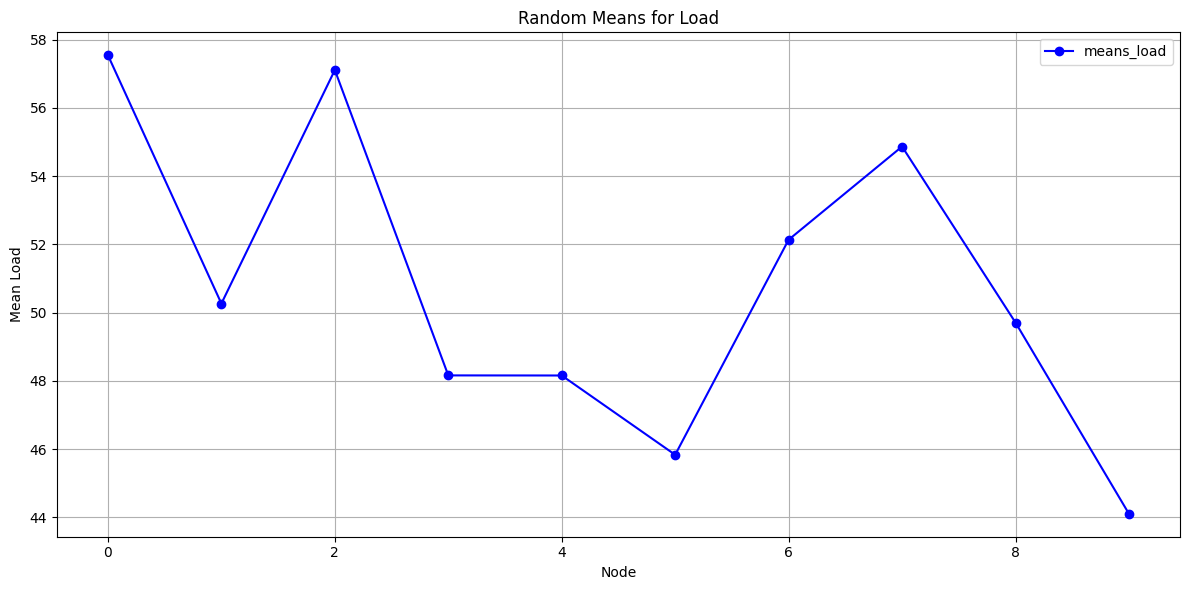

[57.54598479 50.26480447 57.11270918 48.1583471  48.15561231 45.83044353
 52.13647972 54.86913661 49.70762901 44.10009161]


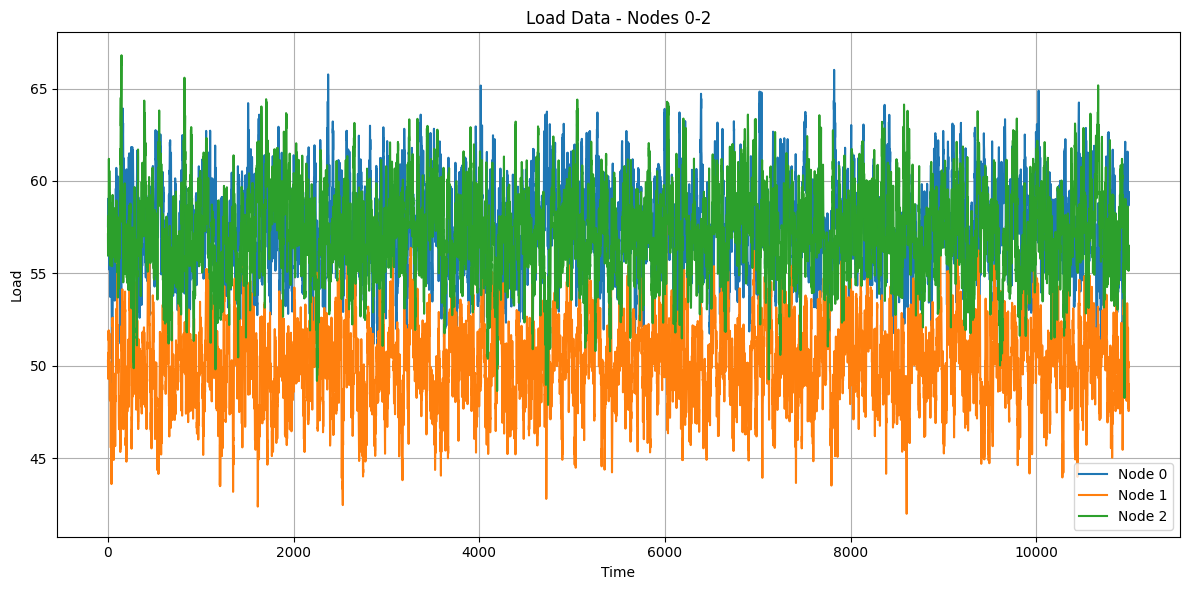

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Function to generate random means
def generate_means(N, mean_load, var_load):
    print('Mean Load:', mean_load, '; Variance Load:', var_load)
    means_load = np.random.normal(loc=mean_load, scale=np.sqrt(var_load), size=N)

    # Plotting means_load
    plt.figure(figsize=(12, 6))
    plt.plot(means_load, marker='o', linestyle='-', color='b', label='means_load')
    plt.title('Random Means for Load')
    plt.xlabel('Node')
    plt.ylabel('Mean Load')
    plt.legend()
    plt.grid(True)

    # Adjust layout
    plt.tight_layout()
    plt.show()

    return means_load


# Function to generate IID data
def generate_iid_data(N, T, means_load):
    loads = np.array([np.random.normal(loc=means_load[i], scale=1, size=T) for i in range(N)])

    return loads, np.mean(loads, axis=1)


# Function to generate AR(1) data
def generate_ar1_data(N, T, means_load, theta):
    loads = np.zeros((N, T))

    def generate_ar1(theta, T, mean_node):
        ar1 = np.zeros(T)
        ar1[0] = mean_node
        for t in range(1, T):
            ar1[t] = theta * ar1[t - 1] + (1 - theta) * mean_node + np.random.normal(0, 1)
        return ar1

    for i in range(N):
        loads[i] = generate_ar1(theta, T, means_load[i])

    return loads, np.mean(loads, axis=1)


# 绘制指定范围内的数据
def plot_range_data(load_data, start, end, title='Load Data'):
    N, T = load_data.shape
    time_steps = np.arange(start, end)

    plt.figure(figsize=(12, 6))
    for i in range(N):
        plt.plot(time_steps, load_data[i, start:end], label=f'Node {i}')
    plt.title(f'{title} - Nodes {0}-{N - 1}')
    plt.xlabel('Time')
    plt.ylabel('Load')
    plt.legend()
    plt.grid(True)

    # Adjust layout
    plt.tight_layout()
    plt.show()


N = 10
T_train = 10000
T_test = 1000
T = T_train + T_test
mean_load = 50
var_load = 10

means_load = generate_means(N, mean_load, var_load)
print(means_load)

# Generate IID data
load_iid, load_iid_means = generate_iid_data(N, T, means_load)

# Generate AR(1) data
theta = 0.9
load_ar1, load_ar1_means = generate_ar1_data(N, T, means_load, theta)
# Plotting AR(1) data
plot_range_data(load_ar1[:3], 0, T)

In [3]:
# 将生成的数据转换为pandas DataFrame并导出为CSV文件
def export_to_csv(load_data, filename):
    df = pd.DataFrame(load_data)
    df.to_csv(filename, index=False)
    print(f"Data exported to {filename}")

# 将IID数据导出为CSV
export_to_csv(load_iid, 'load_iid_data.csv')

# 将AR(1)数据导出为CSV
export_to_csv(load_ar1, 'load_ar1_data.csv')

Data exported to load_iid_data.csv
Data exported to load_ar1_data.csv


In [ ]:
class Config():
    class GlobalConfig:
        def __init__(self):
            self.N = 10
            self.T_train_val = 10000
            self.T_test = 1000
            self.T = self.T_train_val + self.T_test

    class ARConfig:
        def __init__(self):
            self.order = 5
            

    class LSTMConfig:
        def __init__(self):
            self.seq_length = 20
            self.batch_size = 64
            self.input_size = 10
            self.hidden_size = 50
            self.output_size = 10
            self.num_layers = 4
            self.learning_rate = 0.001
            self.num_epochs = 100
            self.device = 'cuda' if torch.cuda.is_available() else 'cpu'

    class GNNConfig:
        def __init__(self):
            self.N = 10
            self.T_train_val = 10000
            self.T_test = 1000
            self.T = self.T_train_val + self.T_test
            self.ar.seq_length = 20
            self.batch_size = 64
            self.input_size = 10
            self.hidden_size = 50
            self.output_size = 10
            self.num_layers = 4
            self.learning_rate = 0.001
            self.num_epochs = 100
            self.device = 'cuda' if torch.cuda.is_available() else 'cpu'

    def __init__(self):

EXP4 Alg

In [ ]:
class DataManage:
    